Q.
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [ ]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [2]:
samsung_reviews=[]

## Extracting reviews from amazon for product Samsung Galaxy S20

In [3]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op

In [4]:
 samsung_reviews

['\n\n  Best mobile with this price range. I loved the camera quality which have 100x zoom.\n\n',
 '\n\n  Great product. Smooth 120Hz display refresh rate. Perfect camera system, with fixed auto focus issue. Large size but good weight distribution. Recommend to buy a spigen case with it to protect this very expensive phone.Screen protector is pre applied.Battery life on exynos chip can be between 5-6 hours screen on time (BT, WiFi, on and connected).\n\n',
 "\n\n  AMAZINGLY DESIGN WITH LOVEABLE CAMERA WITH HIGH DETAIL'S\n\n",
 '\n\n  Great Device ,JUST upgraded from Note 10 +Read my review , hope it will help you1. Display ( 5/5 ) - Samsung brand makes one of the greatest displays in the smartphone industry , This is absolutely best .. Quad Hd Amoled Dynamic Display is a treat .... The display size is around 7 which is great who likes big sized phones ( like me )...2 . Sound ( 4.5/5 ) - Better sound and louder than my previous note 10 + ....... You will enjoy the sound quality in games

In [5]:
reviews = ' '.join(samsung_reviews)

## Data Cleaning

In [6]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

## tokenize

In [7]:
reviews_token = word_tokenize(reviews)

In [8]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]

In [9]:
reviews_without_sw

['best',
 'mobile',
 'price',
 'range',
 'loved',
 'camera',
 'quality',
 'x',
 'zoom',
 'great',
 'product',
 'smooth',
 'hz',
 'display',
 'refresh',
 'rate',
 'perfect',
 'camera',
 'system',
 'fixed',
 'auto',
 'focus',
 'issue',
 'large',
 'size',
 'good',
 'weight',
 'distribution',
 'recommend',
 'buy',
 'spigen',
 'case',
 'protect',
 'expensive',
 'phone',
 'screen',
 'protector',
 'pre',
 'applied',
 'battery',
 'life',
 'exynos',
 'chip',
 'hours',
 'screen',
 'time',
 'bt',
 'wifi',
 'connected',
 'amazingly',
 'design',
 'loveable',
 'camera',
 'high',
 'detail',
 'great',
 'device',
 'upgraded',
 'note',
 'read',
 'review',
 'hope',
 'help',
 'display',
 'samsung',
 'brand',
 'makes',
 'greatest',
 'displays',
 'smartphone',
 'industry',
 'absolutely',
 'best',
 'quad',
 'hd',
 'amoled',
 'dynamic',
 'display',
 'treat',
 'display',
 'size',
 'around',
 'great',
 'likes',
 'big',
 'sized',
 'phones',
 'like',
 'sound',
 'better',
 'sound',
 'louder',
 'previous',
 'note',

In [10]:
reviews=' '.join(reviews_without_sw)

## Word cloud

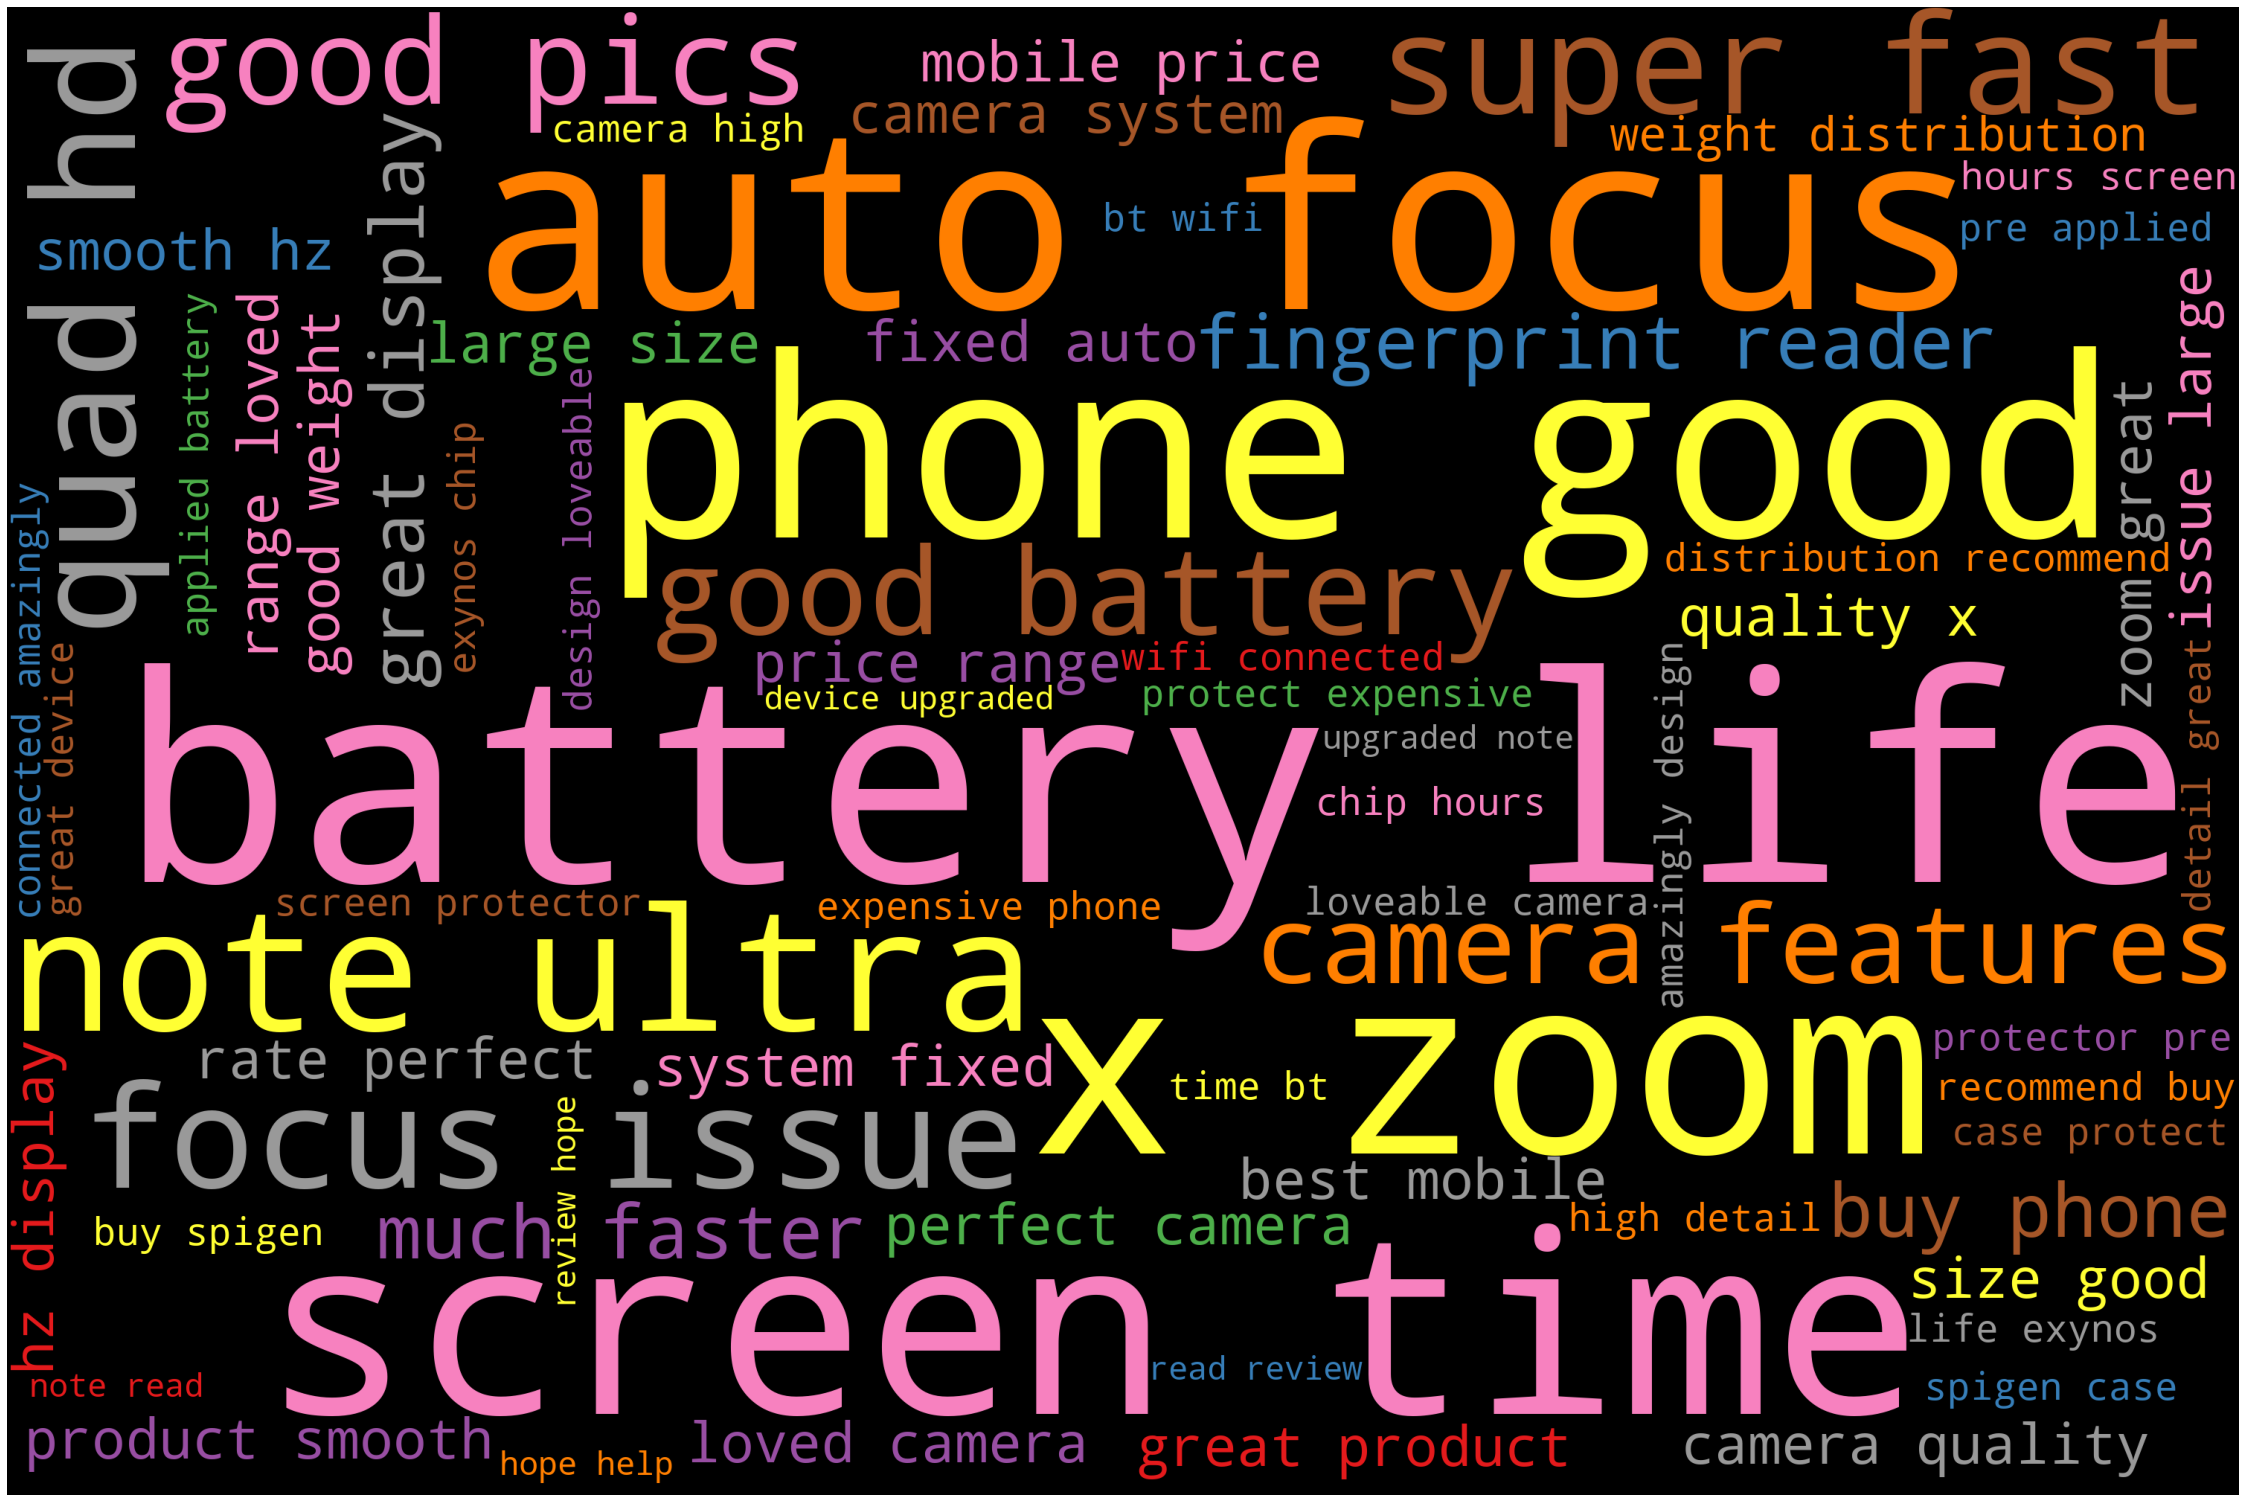

In [11]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

### Emotion Mining

In [12]:
with open("E:\\data science\\assiments\\11\\negative-words.txt","r") as f:
    negative=f.read().split("\n")

In [13]:
negative = negative[35:]

In [14]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

### Word Cloud for negative word

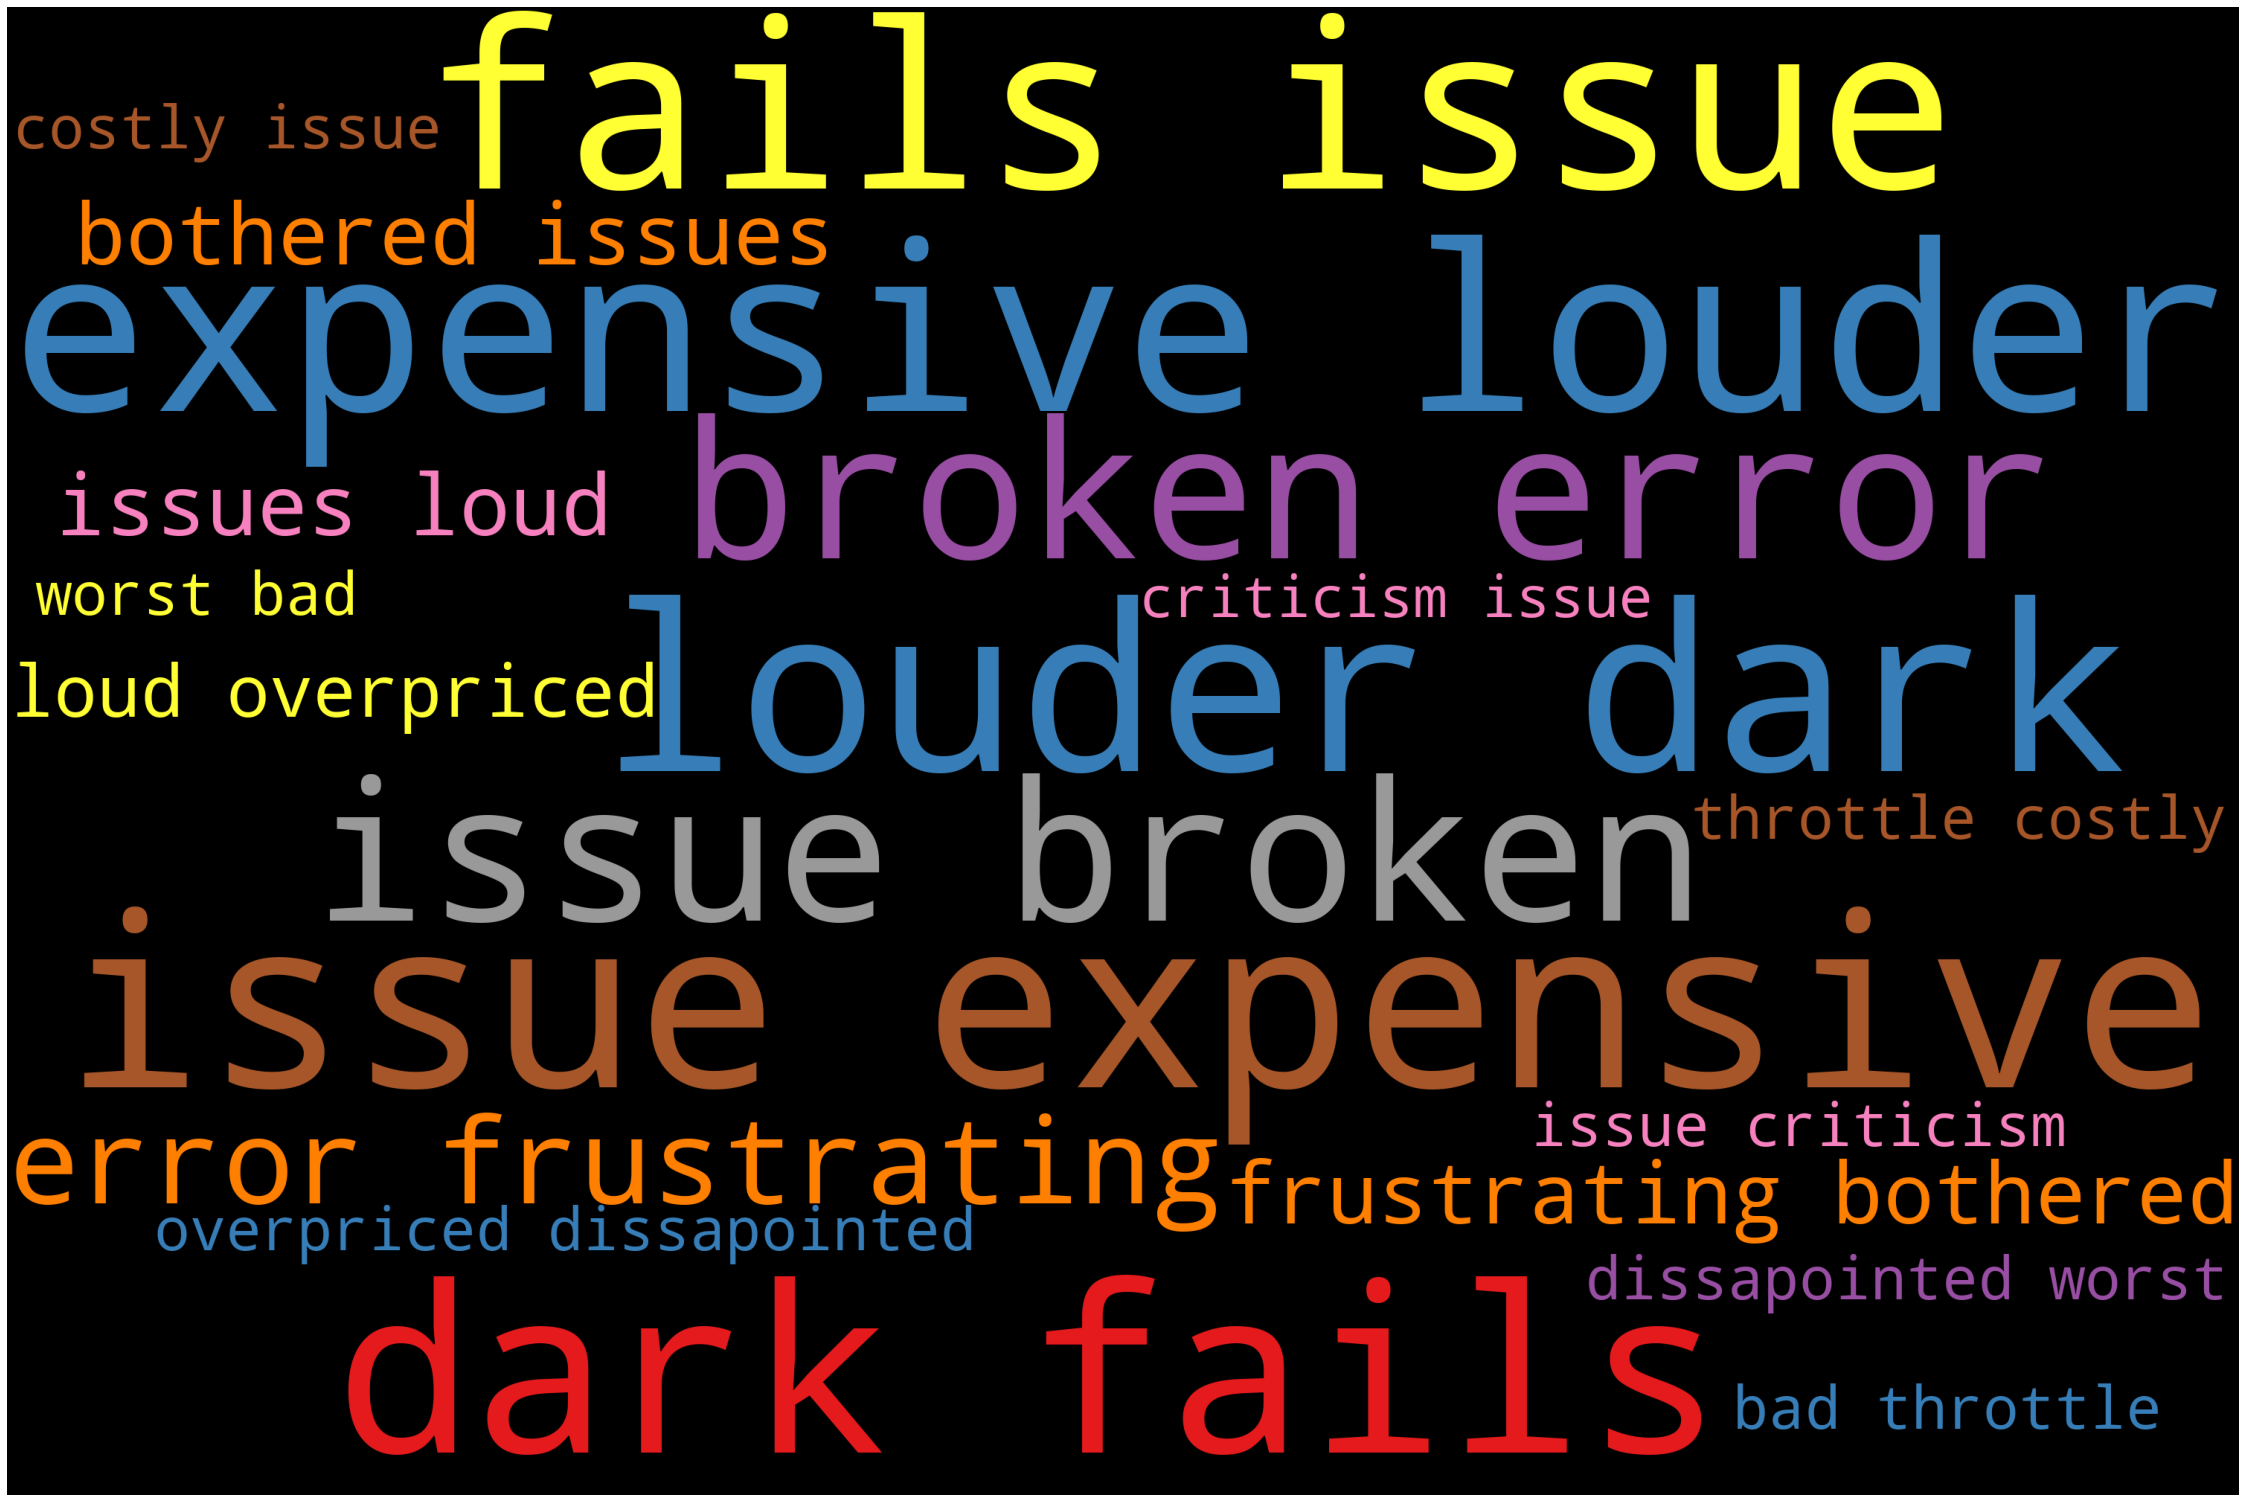

In [20]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [16]:
with open("E:\\data science\\assiments\\11\\positive-words.txt","r") as f:
    positive=f.read().split("\n")

In [17]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [18]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

## Word Cloud for positive word

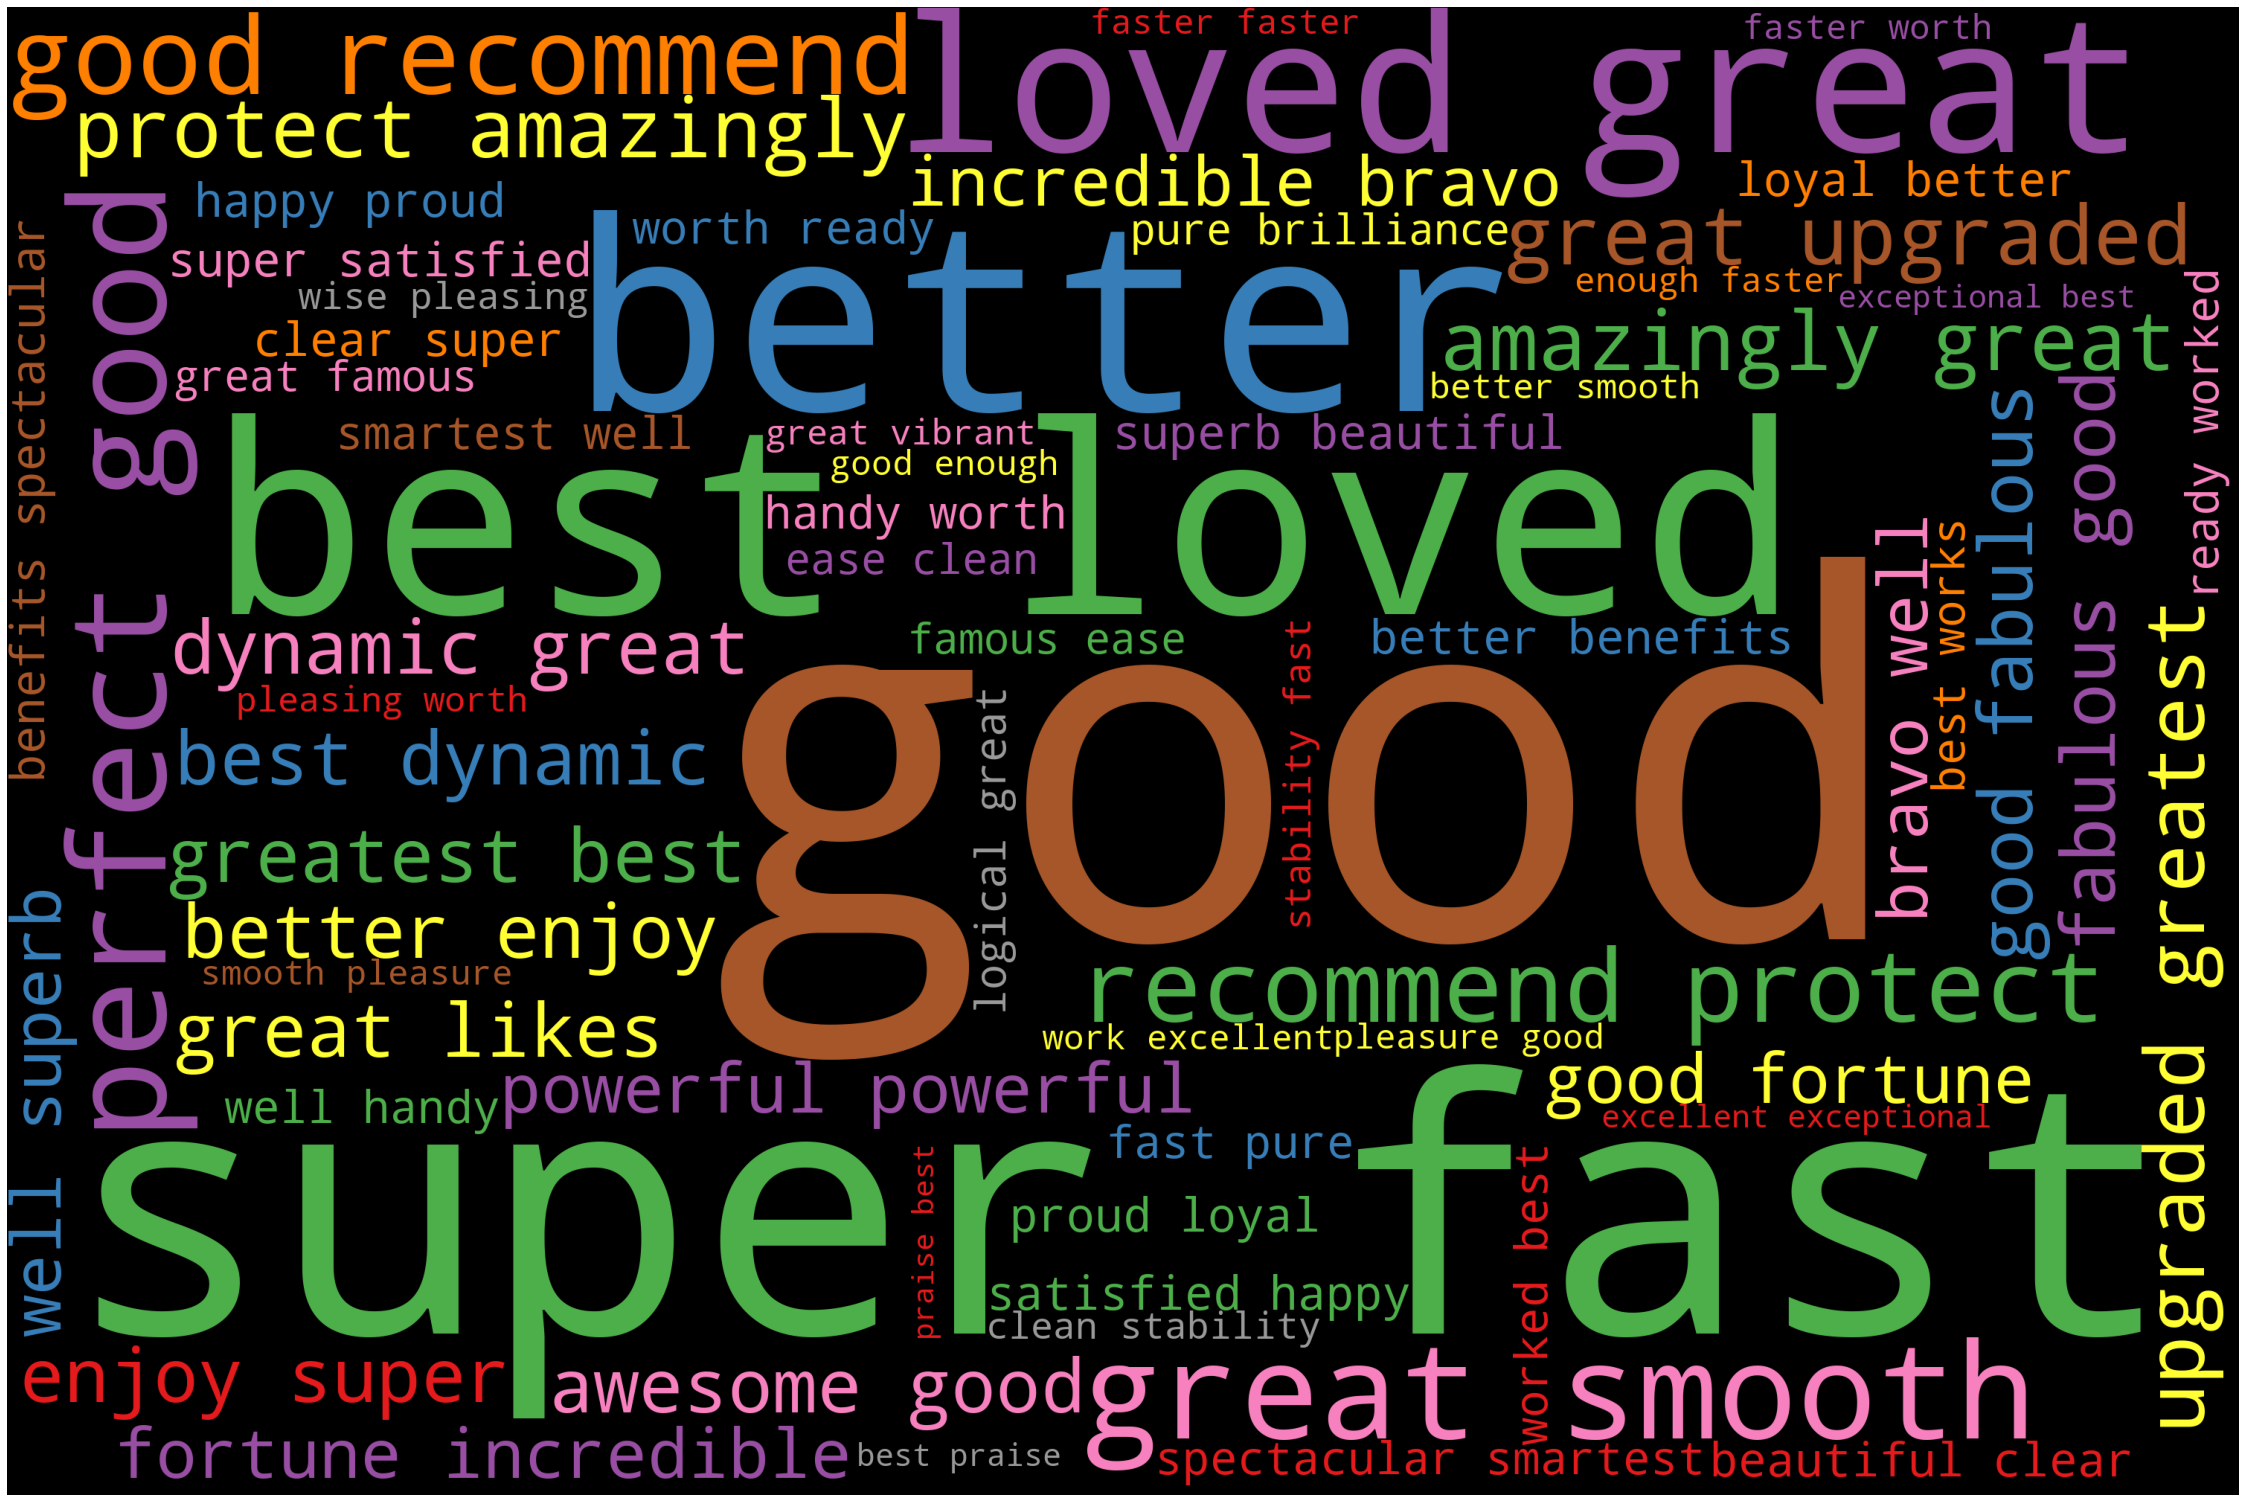

In [22]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)